# Исследование данных о продажах игр

Мы работаем в интернет-магазине, который продаёт по всему миру компьютерные игры. Из открытых источников нам доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы.

Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

# Содержание
1. [Этап 1 - Загрузка и просмотр данных](#stage_1)
  * [Вывод первого этапа](#stage_1_summary)
        

2. [Этап 2 - Подготовка данных к анализу](#stage_2)
   
  * [Изменение типов данных](#stage_2_types)
  * [Работа с пропусками](#stage_2_empty)
  * [Поиск дублей](#stage_2_dubles)
  * [Минимумы и максимумы](#stage_2_minmax)
  * [Расчет и добавление новых данных](#stage_2_newdata)   
  * [Вывод второго этапа](#stage_2_summary)
       

3. [Этап 3 - Анализ данных](#stage_3)
   
  * [Определение периода для анализа](#stage_3_period_for_analysis)
  * [Анализ данных](#stage_3_analysis)
    * [Поиск перспективных платформ](#stage_3_analysis_perspective_platform)
    * [Анализ продаж игр по платформам](#stage_3_analysis_sales_boxplot)
    * [Оценка корреляции между рейтингом игры и ее продажами](#stage_3_analysis_correlation)
    * [Продажи игр в зависимости от жанра](#stage_3_analysis_genre_sales)
  * [Вывод третьего этапа](#stage_3_summary)


4. [Этап 4 - Предпочтения игроков из разных регионов](#stage_4)
  
  * [Предпочитаемая платформа](#stage_4_platform)
  * [Предпочитаемые жанры](#stage_4_genre)
  * [Влияние рейтинга ESRB на продажи](#stage_4_ESRB)
  * [Вывод четвертого этапа](#stage_4_summary)


5. [Этап 5 - Проверка гипотез](#stage_5)
  
  * [Гипотеза 1](#stage_5_hypothesis_1)
  * [Гипотеза 2](#stage_5_hypothesis_2)
  * [Вывод пятого этапа](#stage_5_summary)
    

6. [Общий вывод](#conclusion)

# Этап 1 - Загрузка и просмотр данных <a id="stage_1"></a>

Подключим необходимые библиотеки для работы с данными

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

Методом `read_csv` загрузим предоставленный датасет в датафрейм и выведем его на экран

In [2]:
df = pd.read_csv('/datasets/games.csv')
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Отобразим общую информацию о загруженной таблице

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Вывод <a id="stage_1_summary"></a>

Таблица содержит следующую информацию:
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB

После беглого анализа загруженных данных мы видим следующее:

* наименования столбцов необходимо привести в нижний регистр для того чтобы упростить обращения к ним
* необходимо проверить две строки в которых не заполнены поле `Name` и две строки в которых не заполнены поле `Genre`, возможно это одни и те же строки
* строки у которых не заполнен год релиза мы удалим из таблицы ввиду небольшого их количества
* тип данных в столбце `User_Score` должен быть `float`, из за того что из датасета он загрузился с типом `object` мы можем предположить что в нем содержится текстовая информация
* ячейки с незаполненным рейтингом мы не будем заполнять в связи с тем что рейтинг игры может быть очень важен для оценки ее успешности на рынке
* в столбце `Year_of_Release` тип данных должен быть `int` (после проведения работы с пропусками данных)
* необходимо будет проверить таблицу на дубликаты, столбцы с категориями (`Platform`, `Genre`, `Rating`) необходимо будет проверить на уникальность категорий
* дополнительно проверим все минимальные и максимальные значения в столбцах для того чтобы убедится что в них нет странных данных

    


# Этап 2 - Подготовка данных к анализу<a id="stage_2"></a>

В первую очередь изменим регистр в названиях столбцов специальным методом `lower`

In [4]:
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Изменение типов данных<a id="stage_2_types"></a>

#### year_of_release

Прежде чем изменить тип данных в столбце `year_of_release` на `int` необходимо избавится от пропущенной информации в этом столбце, проверим сколько таких строк

In [5]:
df.query('year_of_release.isnull()').shape[0]

269

269, всего в таблице 16715 строк, посчитаем какой процент от всего датасета занимают строки с пропущенным годом выхода игры

In [6]:
round(df.query('year_of_release.isnull()').shape[0] / df.shape[0] * 100, 2)

1.61

Менее 2%. В связи с тем, что мы не сможем заполнить эти пропуски достоверной информацией и тем, что для дальнейшего анализа год выпуска игры важен нам придется удалить эти строки

In [7]:
df = df.dropna(subset=['year_of_release']).reset_index(drop=True)

Теперь мы сможем изменить тип данных в этом столбце

In [8]:
df['year_of_release'] = df['year_of_release'].astype('int')

#### user_score

Столбец `user_score` должен содержать только числовую информацию, выведем на экран уникальные значения методом `unique`

In [9]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Среди уникальных значений есть два которые не являются числами:
1. `nan`
2. `tbd`

Значением `nan` обозначаются пропущенные данные, а запись `tbd` обозначает аббревиатуру "To Be Determined" - "Будет определено" и, в данном случае, означает то, что пользовательский рейтинг для игры не был рассчитан на момент формирования датасета. 

Из-за того, что пользовательский рейтинг важен для определения успешности игры, мы не будем заполнять пропуски (`nan` и `tbd`) средними или медианными значениями по таблице, только изменим тип данных в столбце на `float` для этого заменим `tbd` на `nan`

Методом `replace` заменим `tbd` на пустоту

In [10]:
df['user_score'] = df['user_score'].replace('tbd', '')

Изменим тип столбца в числовой специальным методом `to_numeric`

In [11]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

#### critic_score

Хотя столбец `critic_score` и содержит целочисленные значения, но мы все равно не можем привести тип данных его содержимого к типу `int` в связи с тем, что в нем содержится большое количество пропущеных данных, которые не могут быть заполнены исходя из имеющихся сведений, поэтому столбец останется с типом данных `float`

### Работа с пропусками<a id="stage_2_empty"></a>

Посчитаем количество пропусков в таблице

In [12]:
df.isnull().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8463
user_score         8983
rating             6678
dtype: int64

Мы уже удалили из таблицы 269 строк с пропущенным значением в столбце `year_of_release` и проверили пропуски в столбце `user_score`, теперь выведем на экран 2 строки с пропущенным значением в поле `name`

In [13]:
df.query('name.isnull()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
652,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14022,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Обе пропущенных строки кроме пропуска в `name` содержат и пропуски в столбце `genre`, посчитаем какую часть таблицы они составляют

In [14]:
round(df.query('name.isnull()').shape[0] / df.shape[0] * 100, 2)

0.01

Менее 1%, кроме того год выпуска этих игр 1993, а значит мы даже не будем учитывать эти данные при анализе успешности современных игр, удалим эти записи из таблицы

In [15]:
df = df.dropna(subset=['name']).reset_index(drop=True)

Как уже отмечалось выше - рейтинг игры очень важен для оценки ее успешности, мы могли бы заполнить пропуски в столбцах `critic_score`, `user_score`  например медианой по жанру в разрезе лет или платформ, но это исказит исходные данные, поэтому мы оставим пропуски без изменений

Пропуски в столбце `rating` мы оставим для того чтобы оценить как наличие оценки организации ESRB влияет на продажи игр

### Поиск дублей<a id="stage_2_dubles"></a>

На первом этапе мы определили что категориальные данные содержатся в столбцах `platform`, `genre` и `rating`

Проверим каждый столбец на уникальность значений

In [16]:
df['platform'].value_counts().sort_index()

2600     116
3DO        3
3DS      512
DC        52
DS      2121
GB        97
GBA      811
GC       542
GEN       27
GG         1
N64      316
NES       98
NG        12
PC       957
PCFX       1
PS      1190
PS2     2127
PS3     1306
PS4      392
PSP     1193
PSV      429
SAT      173
SCD        6
SNES     239
TG16       2
WS         6
Wii     1286
WiiU     147
X360    1232
XB       803
XOne     247
Name: platform, dtype: int64

In [17]:
df['genre'].value_counts().sort_index()

Action          3307
Adventure       1293
Fighting         837
Misc            1721
Platform         878
Puzzle           569
Racing          1226
Role-Playing    1481
Shooter         1296
Simulation       857
Sports          2306
Strategy         673
Name: genre, dtype: int64

In [18]:
df['rating'].value_counts().sort_index()

AO         1
E       3921
E10+    1393
EC         8
K-A        3
M       1536
RP         1
T       2905
Name: rating, dtype: int64

Повторяющихся значений нет ни в одном из столбцов

Теперь проверим всю таблицу на дубликаты

In [19]:
df.duplicated().sum()

0

Дублей в таблице нет

### Минимумы и максимумы<a id="stage_2_minmax"></a>

In [20]:
pd.concat([df.min(), df.max()], axis=1, keys=['min', 'max'])

,min,max
name,Beyblade Burst,¡Shin Chan Flipa en colores!
platform,2600,XOne
year_of_release,1980,2016
genre,Action,Strategy
na_sales,0,41.36
eu_sales,0,28.96
jp_sales,0,10.22
other_sales,0,10.57
critic_score,13,98
user_score,0,9.7


Содержимого явно не соответствующего столбцу нет

### Расчет и добавление новых данных<a id="stage_2_newdata"></a>

Добавим в таблицу столбец содержащий сведения о продажах по всему миру `worldwide_sales`

In [21]:
df['worldwide_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

## Вывод <a id="stage_2_summary"></a>

На этапе предобработки данных мы удалили из таблицы 269 строк с пропущенной датой выпуска игры и 2 строки с незаполненным названием и жанром игры

Изменили тип данных в столбцах содержащих год релиза и пользовательскую оценку (кроме того в этом столбце мы заменили на пустоту все текстовые значения tbd которые означают что пользовательсткая оценка еще не определена

Проверили всю таблицу и столбцы с категориями на дубликаты (они не были обнаружены), проверили минимальные и максимальные значения каждого столбца для того чтобы убедится в отсутствии явно неверных значений (их также не оказалось)

Кроме того было принято решение о том что мы не будем заполнять пропуски с толбцах с оценкой критиков и пользователей в связи с тем что эти данные будут очень важны при оценке успешности игры

На последнем этапе мы добавили в таблицу новый столбец который содержит сведения об общемировых продажах каждой игры

# Этап 3 - Анализ данных<a id="stage_3"></a>

### Определение периода для анализа<a id="stage_3_period_for_analysis"></a>

Для того чтобы построить гистограмму выпуска игр по годам нам необходимо определить количество лет (корзин) за который у нас есть наблюдения

In [22]:
len(df['year_of_release'].unique())

37

Всего в таблице содержатся данные за 37 лет (с 1980 по 2016 включительно), построим гистограмму

Text(0, 0.5, 'Игры, шт')

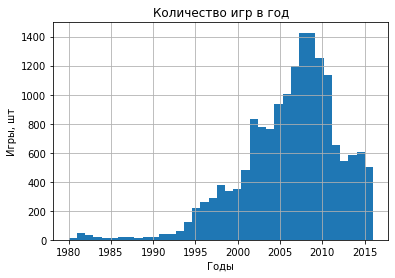

In [23]:
df['year_of_release'].plot(kind='hist', bins=37, grid=True, title='Количество игр в год')
plt.xlabel('Годы')
plt.ylabel('Игры, шт')

На гистрограмме мы видим сильное падение выпуска игр после 2010 года, построим сводную таблицу для того чтобы подтвердить это наблюдение

In [24]:
df.pivot_table(index='year_of_release', values='worldwide_sales', aggfunc='count').\
   reset_index().query('year_of_release >= 2010')

,year_of_release,worldwide_sales
30,2010,1255
31,2011,1136
32,2012,653
33,2013,544
34,2014,581
35,2015,606
36,2016,502


С 2012 года включительно выпуск игр упал в два раза, видимо на рынке игровых платформ что-то произошло

Построим сводную таблицу в которой отобразим первую дату появления игры для каждой платформы

In [25]:
df.pivot_table(index='platform', values='year_of_release', aggfunc='min').\
   sort_values('year_of_release', ascending=False).head(10)

,year_of_release
platform,
XOne,2013
PS4,2013
WiiU,2012
3DS,2011
PSV,2011
PS3,2006
Wii,2006
X360,2005
PSP,2004


Мы нашли объяснение падению количества выпуска игр в год в два раза - в 2011-2013 годы на замену старым платформам были выпущены новые. То есть на рубеже поколений разработка игр для старых консолей замедлилась а для новых еще не началась в полную силу, отметим этот момент - **смена поколений произошла в 2011 году**

Построим сводную таблицу в которой соберем продажи игр по каждой платформе и отобразим 5 платформ с максимальными продажами

In [26]:
top_sales = df.pivot_table(index=['platform'], values='worldwide_sales', aggfunc='sum').\
               sort_values('worldwide_sales', ascending=False).head(5)
top_sales

,worldwide_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78


В таблицу попали только платформы вышедшие до 2011 года, предыдущее поколение, это объясняется тем что с момента появления этого поколения прошло 12 лет, а новое поколение на рынке только 3 года

Построим графики продаж по годам по каждой платформе, для этого определим специальную функцию `make_bar_plot` в которую на вход будет поступать название датафрейма и платформа по которой нужно строить график

In [27]:
def make_bar_plot(data, platform):
    data.query('platform == @platform').pivot_table(index=['platform','year_of_release'], 
                                                    values='worldwide_sales', aggfunc='sum').\
                                        reset_index().\
                                        plot(kind='bar', x='year_of_release', y='worldwide_sales', 
                                             grid=True, title=platform, legend=False)
    plt.xlabel('Годы') 
    plt.ylabel('Продажи, млн')

Построим графики распределения продаж по годам для платформ из Топ5

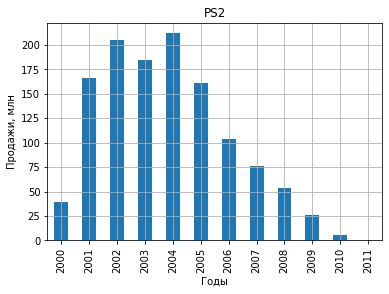

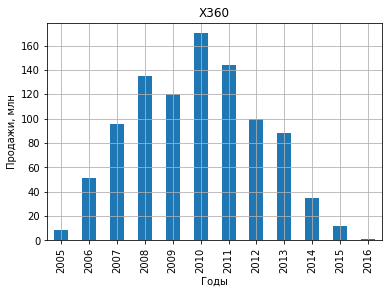

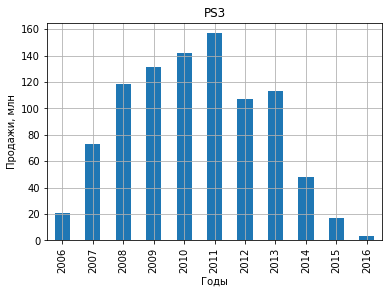

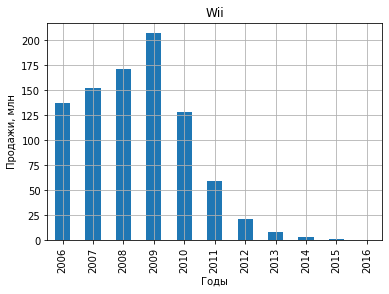

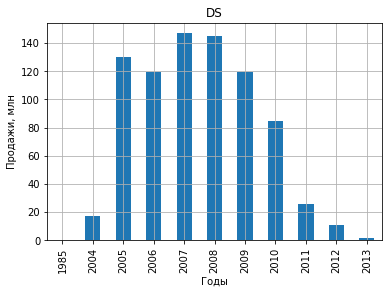

In [28]:
for platform in top_sales.index:
    make_bar_plot(df, platform)

На построенных графиках мы видим что срок жизни игровой платформы составляет около 10 лет

После выхода следующего поколения на предыдущем продажи игр не прекращаются, но они очень сильно снижаются: в два раза за каждый год

Отметим этот момент - **с выходом нового поколения продажи на предыдущем поколении не прекращаются**

Стоит обратить внимание на график по платформе DS

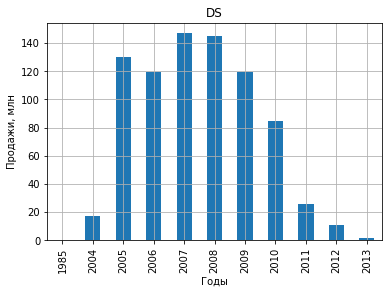

In [29]:
make_bar_plot(df, 'DS')

Аббревиатура DS расшифровывается как Nintendo DS и вышла она в 2004 году. на графике (а значит и в таблице) есть записи об играх вышедших на этой платформе в 1985 году, выведем их на экран

In [30]:
df.query('platform == "DS" & year_of_release < 2004')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,worldwide_sales
15704,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,NaN,0.02


Игра всего одна, продавалась только в Японии и не имеет записей о рейтингах, удалим ее из таблицы

In [31]:
df = df.drop(df.query('platform == "DS" & year_of_release < 2004').index)
df = df.reset_index(drop=True)

Сравним количество игр и продажи на предыдущем и текущем поколениях

Для этого создадим функцию разделяющую всю таблицу на поколения по году выхода платформы на рынок

Поколения разделяются следующим образом:
* Последнее поколение - все платформы вышедшие после 2011 года
* Предыдущее поколение - все платформы вышедшие с 2004 по 2011 год

In [32]:
def generation_define(year):
    if year >= 2011:
        return 'last'
    elif 2004 <= year < 2011:
        return 'previous'

Применим вновь созданную функцию к сводной таблице в которой отображаются платформы и даты появления первых игр

In [33]:
platform_first_release = df.pivot_table(index='platform', values='year_of_release', aggfunc='min').\
                            reset_index()
platform_first_release['generation'] = platform_first_release['year_of_release'].\
                                       apply(generation_define)

Объединим полученные значения с основной таблицей методом `merge`

In [34]:
df = df.merge(platform_first_release[['platform','generation']], on='platform', how='left')

Добавим данные о поколении и для платформы PC (персонального компьютера)

In [35]:
df.loc[(df['platform'] == 'PC') & (df['year_of_release'] >= 2011), 'generation'] = 'last'
df.loc[(df['platform'] == 'PC') & (df['year_of_release'] >= 2004) & (df['year_of_release'] < 2011), 'generation'] = 'previous'

Построим сводную таблицу

In [36]:
df.pivot_table(index=['generation','year_of_release'], 
               values='worldwide_sales', 
               aggfunc=['sum','count'])

sum           count
                           worldwide_sales worldwide_sales
generation year_of_release                                
last       2011                     102.86             273
           2012                     108.33             239
           2013                     146.14             269
           2014                     245.04             394
           2015                     237.94             491
           2016                     124.64             450
previous   2004                      34.72              68
           2005                     186.60             268
           2006                     387.71             606
           2007                     524.52             969
           2008                     617.38            1234
           2009                     632.42            1330
           2010                     584.49            1217
           2011                     404.27             856
           2012                     247.51             414
           2013                     215.10             275
           2014                      86.49             187
           2015                      30.04             115
           2016                       5.30              52

Наглядное подтверждение наших выводов. При смене поколения продажи на предыдущем поколении продолжаются, но с каждым годом снижаются. 

Таким образом, в результате анализа смены поколений и продаж игр по поколениям мы делаем вывод о том что **актуальным периодом для анализа будет период начиная с 2004 года** но только по платформам которые были выпущены начиная с этого года

Создадим новый датафрейм `actual_data` в который запишем данные о последнем и предыдущем поколениях

In [37]:
actual_data = df.loc[(df['generation'] == 'last') | (df['generation'] == 'previous')]
actual_data.reset_index(drop=True)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,worldwide_sales,generation
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,previous
1,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,previous
2,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77,previous
3,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80,previous
4,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91,previous
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9702,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01,last
9703,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01,previous
9704,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01,previous
9705,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01,last


### Анализ данных<a id="stage_3_analysis"></a>

#### Поиск перспективных платформ<a id="stage_3_analysis_perspective_platform"></a>

Построим таблицы содержащие суммарные продажи по каждой платформе и отсортируем их по возрастанию

In [38]:
gen_top = actual_data.pivot_table(index=['generation','platform'], values='worldwide_sales', 
                                  aggfunc='sum').\
                      sort_values(['generation','worldwide_sales'], ascending=False).reset_index()
prev_gen_top = gen_top.query('generation == "previous"')
last_gen_top = gen_top.query('generation == "last"')

Топ по платформам предыдущего поколения

In [39]:
prev_gen_top[['platform','worldwide_sales']]

,platform,worldwide_sales
0,X360,961.24
1,PS3,931.34
2,Wii,891.18
3,DS,802.76
4,PSP,289.53
5,PC,80.50


Топ по платформам последнего поколения

In [40]:
last_gen_top[['platform','worldwide_sales']]

,platform,worldwide_sales
6,PS4,314.14
7,3DS,257.81
8,XOne,159.32
9,PC,97.68
10,WiiU,82.19
11,PSV,53.81


Мы уже знаем что продажи на предыдущем поколении падают с момента выхода последнего поколения, поэтому в выборе перспективных платформ они учавствовать не будут

Лидирующими платформами в текущем поколении оказались PS4, 3DS и XOne, построим графики распределения продаж по годам для каждой из них

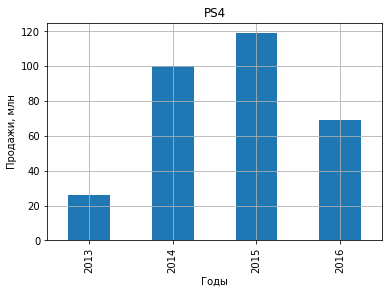

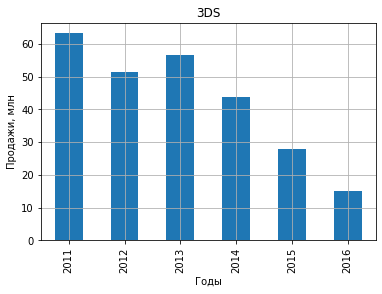

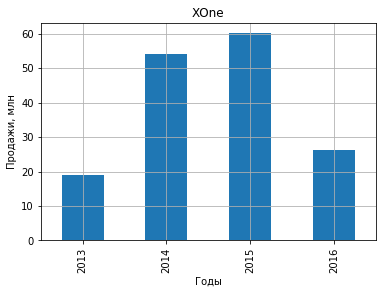

In [41]:
for platform in last_gen_top['platform'].head(3):
    make_bar_plot(actual_data, platform)

Данные 2016 год в нашем распоряжении не полные (финансовую отчетность по итогам года крупные издатели публикуют в начале следующего), если учесть этот факт то на графиках видно что продажи игр на платформах PS4 и XOne растут, а на платформе 3DS падают, это означает то что платформы **PS4 и XOne будут потенциально прибыльными платформами в 2017 году**

#### Анализ продаж игр по платформам<a id="stage_3_analysis_sales_boxplot"></a>

Построим диаграмму boxplot по всем платформам последнего поколения

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 0, 'Платформа')

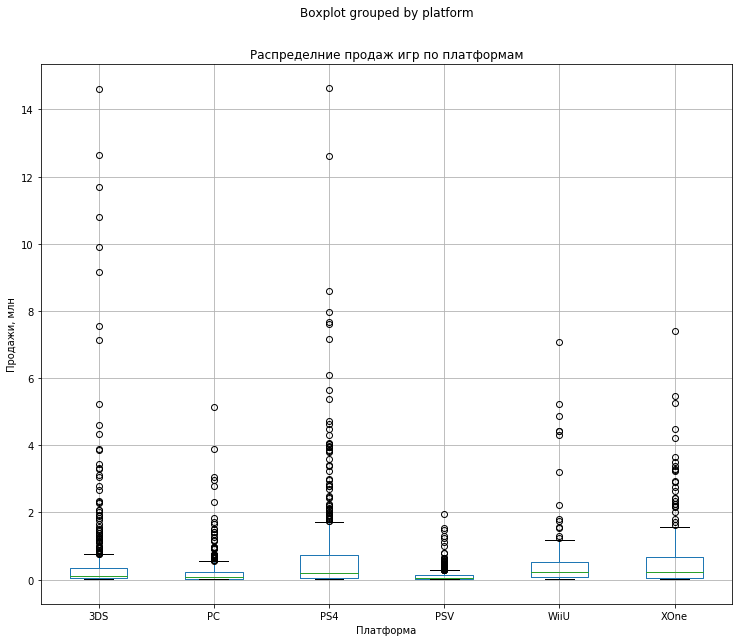

In [42]:
actual_data.query('generation == "last"')[['platform','worldwide_sales']].boxplot(by='platform', 
                                                                                  figsize=(12,10))
plt.title('Распределние продаж игр по платформам')
plt.ylabel('Продажи, млн')
plt.xlabel('Платформа')

На графике видно что в среднем суммарные продажи игр редко превышают 1 млн, однако присутствуют и выдающиеся результаты, выведем на экран количество игр с продажами больше 10 млн по платформам

In [43]:
actual_data.query('worldwide_sales > 10').pivot_table(index=['generation','platform'], 
                                                      values='worldwide_sales', 
                                                      aggfunc=['count','sum']).\
                                          sort_values(['generation',('count', 'worldwide_sales')],
                                                      ascending=False)

count             sum
                    worldwide_sales worldwide_sales
generation platform                                
previous   DS                    10          180.68
           Wii                   10          286.87
           X360                   9          127.95
           PS3                    7           92.61
last       3DS                    4           49.74
           PS4                    2           27.25

Большая часть таких игр вышла на предыдущем поколении, но и на последнем поколении уже успели выйти великолепно продавшиеся игры

Построим boxplot'ы для двух платформ принятыми нами перспективными

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 0, 'Платформа')

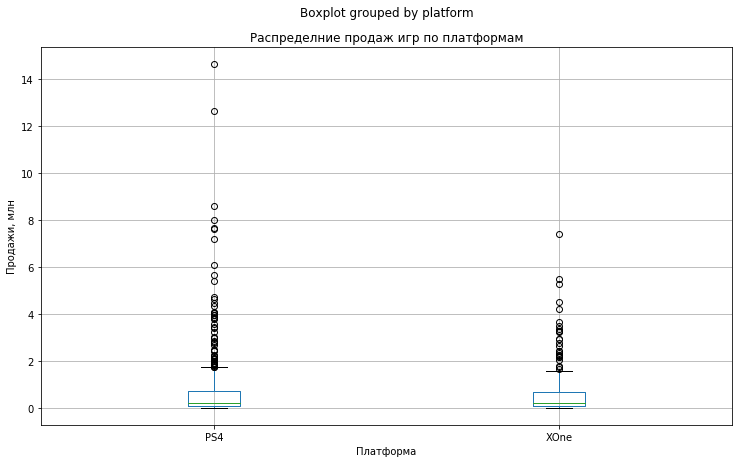

In [44]:
actual_data[['platform','worldwide_sales']].query('platform.isin(["PS4","XOne"])').\
                                            boxplot(by='platform', figsize=(12,7))
plt.title('Распределние продаж игр по платформам')
plt.ylabel('Продажи, млн')
plt.xlabel('Платформа')

На построенной диаграмме мы видим что минимумы и отметки на 25%, 50% и 75% практически совпадают по обеим платформам, однако на PS4 имеется больше игр с продажами выше 2млн

Из за того что "ящик" смещен вниз мы можем предположить что распределние продаж далеко от нормального и ближе к распределению Пуассона

Применим метод `describe` к данным о продажах по обеим платформам

In [45]:
pd.concat([actual_data[['platform','worldwide_sales']].query('platform == "PS4"').describe().round(2),
          actual_data[['platform','worldwide_sales']].query('platform == "XOne"').describe().round(2)],
          keys=['PS4','XOne'], axis=1)

,PS4,XOne
,worldwide_sales,worldwide_sales
count,392.00,247.00
mean,0.80,0.65
std,1.61,1.04
min,0.01,0.01
25%,0.06,0.06
50%,0.20,0.22
75%,0.73,0.68
max,14.63,7.39


Основные статистические показатели подтверждают наши выводы по графикам:
* отметки на 25%, 50% и 75% очень близки
* средние продажи каждой игры на платформе PS4 выше
* максимальные продажи игр на платформе PS4 значительно выше чем на XOne

#### Оценка корреляции между рейтингом игры и ее продажами<a id="stage_3_analysis_correlation"></a>

Среди выбранных нами перспективными, наиболее популярна (если судить по продажам) PS4, проверим есть ли корреляция между рейтингами игры и ее продажами на этой платформе

In [46]:
actual_data.query('platform == "PS4"')[['critic_score','user_score','worldwide_sales']].corr()['worldwide_sales'].round(2)

critic_score       0.41
user_score        -0.03
worldwide_sales    1.00
Name: worldwide_sales, dtype: float64

В соответствии со шкалой Чеддока сила связи между оценкой критиков и продажами слабая, а между оценкой пользователей и продажами практически отсутствует

Продемонстрируем силу связи между оценкой критиков и продажами на диаграмме рассеяния

Text(0.5, 0, 'Оценка критиков')

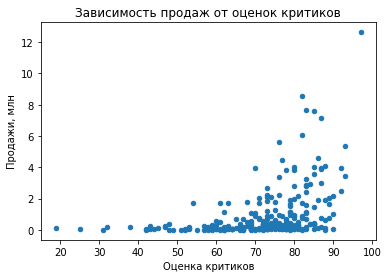

In [47]:
actual_data.query('platform == "PS4"')[['critic_score','worldwide_sales']].\
            plot(kind='scatter', x='critic_score', y='worldwide_sales', 
                 title='Зависимость продаж от оценок критиков')
plt.ylabel('Продажи, млн')
plt.xlabel('Оценка критиков')

Диаграмма рассеяния наглядно демонстирурет что оценка критиков имеет некоторое влияние на уровень продаж: игры с низкой оценкой (менее 50) продаются на медианном уровне или ниже, а игры с высокой оценкой могут продаться очень хорошо

Построим также диаграмму рассеяния самой популярной платформы предыдущего поколения (X360)

Text(0.5, 0, 'Оценка критиков')

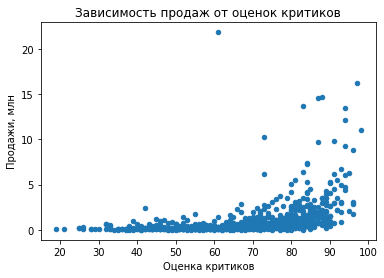

In [48]:
actual_data.query('platform == "X360"')[['critic_score','worldwide_sales']].\
            plot(kind='scatter', x='critic_score', y='worldwide_sales', 
                 title='Зависимость продаж от оценок критиков')
plt.ylabel('Продажи, млн')
plt.xlabel('Оценка критиков')

Наблюдается такая же ситуация как в и последнем поколении - оценка критиков влияет на продажи, но слабо

#### Продажи игр в зависимости от жанра<a id="stage_3_analysis_genre_sales"></a>

Text(0, 0.5, 'Продажи, млн')

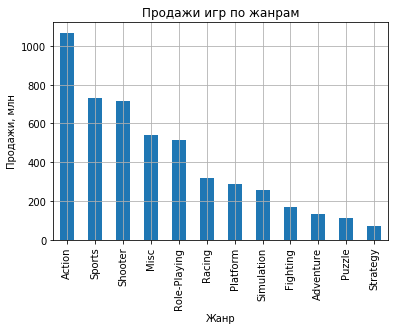

In [49]:
actual_data.pivot_table(index='genre', values='worldwide_sales', aggfunc='sum').\
            sort_values('worldwide_sales', ascending=False).plot(kind='bar', grid=True, legend=False,
                                                                 title='Продажи игр по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Продажи, млн')

In [100]:
actual_data.pivot_table(index='genre', values='worldwide_sales', aggfunc=['mean','count','sum'])

,mean,count,sum
,worldwide_sales,worldwide_sales,worldwide_sales
genre,,,
Action,0.474667,2250,1068.00
Adventure,0.150475,885,133.17
Fighting,0.482479,355,171.28
Misc,0.463768,1165,540.29
Platform,0.888951,324,288.02
Puzzle,0.285013,393,112.01
Racing,0.601434,530,318.76
Role-Playing,0.540578,952,514.63


С большим отрывом лидирует жанр Action, следом, практически наравне идут продажи игр жанров Sports и Shooter, также в пятерке лидеров по продажам присутствуют игры неопределенных жанров (Misc) и РПГ (Role-Playing)

Игры жанров Adventure, Puzzle и Strategy замыкают рейтинг, при этом игры жанра Strategy продаются более чем в 10 раз хуже чем игры жанра Action

## Вывод <a id="stage_3_summary"></a>

Прежде чем анализировать данные мы должны были определить актуальный период и платформы для анализа, для этого мы сделали следющее:
1. Построили график распределения выпуска игр по годам и увидели падение после 2010 года
2. Построили сводную таблицу и уточнили год начала падения - 2012
3. Построили таблицу в которую для каждой игровой платформы отобразили год появления первой игры и таким образом выяснили что выпуск новых игровых платформ произошел в 2004-2006 и 2011-2013 годах, это и объянило падение выпуска игр. Мы определили два этих выпуска как предыдущее и последнее поколения
4. Далее мы построили графики распределения продаж игр по годам для популярных платформ (среди этих графиков оказались только платформы предыдущего поколения в связи с тем что они находятся на рынке гораздо дольше чем платформы последнего поколения), анализ этих графиков показал что в среднем жизненный цикл консоли длится около 10 лет и то что при смене поколения продажи на предыдущем поколении не прекращаются, но с каждым годом снижаются.

Таким образом мы сделали вывод что что актуальным периодом для анализа будет период начиная с 2004 года но только по платформам которые были выпущены начиная с этого года

Далее мы провели анализ данных и пришли к следующим выводам:

* Перспективными платформами в 2017 году мы считаем PS4 и XOne в связи с тем что на графиках продаж игр по годам продажи на этих платформах растут
* Анализ продаж игр по всем платформам показал что в среднем суммарные продажи игр редко превышают 1 млн, однако присутствуют и выдающиеся результаты - игры которые продались более чем на 10 млн, всего таких игр 42 на обоих поколениях
* Подробный анализ продаж на перспективных платформах (PS4 и XOne) показал что отметки на 25%, 50% и 75% очень близки но средние и максимальные продажи игр на платформе PS4 выше чем на XOne, в целом игры на PS4 продаются лучше чем на XOne
* Оценка силы связи между оценками игроков и критиков с продажами игр на самой популярной платформе в последнем поколении (PS4) показала что сила связи между оценкой критиков и продажами слабая, а между оценкой пользователей и продажами практически отсутствует
* После анализа продаж игр по жанрам мы сделали вывод о том, что с большим отрывом лидирует жанр Action, следом, практически наравне идут продажи игр жанров Sports и Shooter, а замыкают рейтинг игры жанров Adventure, Puzzle и Strategy, при этом игры жанра Strategy продаются в 14 раз хуже чем игры жанра Action

# Этап 4 - Предпочтения игроков из разных регионов<a id="stage_4"></a>

### Предпочитаемая платформа<a id="stage_4_platform"></a>

Построим сводные таблицы в разрезе поколений по каждому региону и определим самые популярные платформы в каждом

Определим специальную функцию `top_games` которая на вход будет принимать регион по которому считать продажи а на выход будет выдавать отсортированную таблицу с продажами по каждой платформе и долями занимаемыми на рынке

In [50]:
def top_platform(region_sales):
    
    top_games = actual_data.pivot_table(index=['generation','platform'], values=region_sales, aggfunc='sum').\
                     sort_values(['generation',region_sales], ascending=False).reset_index()
    top_games.loc[top_games['generation'] == 'previous', '%'] = round(top_games[region_sales] / top_games.query('generation == "previous"')[region_sales].sum() * 100, 2)
    top_games.loc[top_games['generation'] == 'last', '%'] = round(top_games[region_sales] / top_games.query('generation == "last"')[region_sales].sum() * 100, 2)
    
    return top_games

#### Северная Америка

In [51]:
top_platform('na_sales')

,generation,platform,na_sales,%
0,previous,X360,595.74,30.11
1,previous,Wii,486.87,24.60
2,previous,PS3,390.13,19.72
3,previous,DS,380.31,19.22
4,previous,PSP,107.27,5.42
5,previous,PC,18.50,0.93
6,last,PS4,108.74,29.80
7,last,XOne,93.12,25.52
8,last,3DS,82.65,22.65
9,last,WiiU,38.10,10.44


На предыдущем поколении (2004-2011) годы лидировала платформа компании Microsoft X360 (30% рынка), следом шла платформа Nintendo Wii (25%), а платформа от компании Sony PS3 (20%) делила третье место по популярности с портативной платформой от Nintendo - DS (19%)

В последнем поколении компании Microsoft и Sony поменялись местами: платформа от Sony (PS4) вырвалась вперед и заняла 30% рынка в то время как платформа от Microsoft (XOne) отстает и занимает 25% рынка. Преемница домашней платформы Wii от компании Nintendo (WiiU) занимает только 10% рынка, в то время как портативная консоль от той же компании (3DS) несколько увеличила долю рынка с 19% (DS) до 23% (3DS)

#### Европа

In [52]:
top_platform('eu_sales')

,generation,platform,eu_sales,%
0,previous,PS3,327.21,28.17
1,previous,X360,268.32,23.10
2,previous,Wii,258.32,22.24
3,previous,DS,188.41,16.22
4,previous,PSP,65.62,5.65
5,previous,PC,53.85,4.64
6,last,PS4,141.09,40.44
7,last,3DS,61.27,17.56
8,last,PC,56.70,16.25
9,last,XOne,51.59,14.79


Расклад сил на европейском рынке во время предыдущего поколения был следующим:
28% Sony и ее PS3, 23% X360 от Microsoft, домашняя платформа от Nintendo Wii занимала 22% рынка, а портативная DS 16%

После выхода последнего поколения Sony резко вырвалась вперед и заняла 40% рынка своей консолью PS4, Microsoft (XOne) откатилась на четвертое место и занимает теперь только 15% рынка, портативная платформа от Nintendo 3DS поднялась на второе место но сохраняет прежнюю долю рынка (16%). На третьем месте по полуярности оказалась платформа PC (персональный компьютер) ее доля на рынке выросла с 5% до 16%.

#### Япония

In [53]:
top_platform('jp_sales')

,generation,platform,jp_sales,%
0,previous,DS,175.00,42.58
1,previous,PS3,79.41,19.32
2,previous,PSP,75.88,18.46
3,previous,Wii,68.28,16.62
4,previous,X360,12.30,2.99
5,previous,PC,0.08,0.02
6,last,3DS,100.62,66.30
7,last,PSV,21.84,14.39
8,last,PS4,15.96,10.52
9,last,WiiU,13.01,8.57


Японский рынок игровых платформ очень сильно отличается от Американского и Европейского, оба поколения лидерство сохраняют именно портативные платформы:

Nintendo DS занимала 43% рынка в прошлом поколении а Nintendo 3DS 66% в последнем поколении. 

На втором месте в прошлом поколении распологалась домашная платформа от Sony (PS3) с долей рынка 19%, в последнем поколении второе место занимает портативная платформа Sony PSV (14%), третье место по доле рынка отзеркалено: в предыдущем поколении портативная платформа Sony PSP (18%) в последнем поколении домашная домашная платформа от Sony PS4 (10%).

Консоли от Microsoft оба поколения представлены очень слабо 3 и 0,2% на предыдущем и последних поколениях соотвественно

### Предпочитаемые жанры<a id="stage_4_genre"></a>

Построим сводные таблицы, для этого определим функцию `top_misc` которая на вход принимаем название столбца по ктороому необходимо группировать данные и регион продаж для вывода, а на выходе формирует Топ5 по запрашиваемым данным

In [54]:
def top_misc(index, region_sales):
    top = actual_data.pivot_table(index=index, values=region_sales, aggfunc='sum').\
                      sort_values(region_sales, ascending=False).head()
    top['%'] = round(top[region_sales] / top[region_sales].sum() * 100, 2)
    return top

#### Северная Америка

In [55]:
top_misc('genre', 'na_sales')

,na_sales,%
genre,,
Action,505.12,29.34
Shooter,374.12,21.73
Sports,369.61,21.47
Misc,276.29,16.05
Role-Playing,196.21,11.40


Игроки из этого региона предпочитают игры жанра Action, второе место делят между собой игры Shooter и Sports

#### Европа

In [56]:
top_misc('genre', 'eu_sales')

,eu_sales,%
genre,,
Action,343.88,31.47
Sports,241.40,22.09
Shooter,238.60,21.83
Misc,147.75,13.52
Racing,121.21,11.09


Предпочтения в жанрах игроков из Европы совпадают с предпочтениями игроков из Северной Америки, разница только в последних жанрах из Топ5 - в Северной Америке там расположились игры жанра Role-Playing а в Европе игры жанра Racing

#### Япония

In [57]:
top_misc('genre', 'jp_sales')

,jp_sales,%
genre,,
Role-Playing,164.29,39.91
Action,97.82,23.76
Misc,69.36,16.85
Sports,42.85,10.41
Platform,37.38,9.08


Предпочтения японских игроков снова отличаются от остального мира, на первом месте Топ5, с отрывом почти в два раза, у них располагаются игры жанра Role-Playing, на втором месте игры жанра Action, на третьем месте игры неопределеноого жанра.

### Влияние рейтинга ESRB на продажи<a id="stage_4_ESRB"></a>

#### Северная Америка

In [58]:
top_misc('rating', 'na_sales')

,na_sales,%
rating,,
E,795.88,38.58
M,569.40,27.60
T,397.78,19.28
E10+,298.77,14.48
EC,1.32,0.06


#### Европа

In [59]:
top_misc('rating', 'eu_sales')

,eu_sales,%
rating,,
E,480.16,37.51
M,399.14,31.18
T,234.33,18.31
E10+,166.33,12.99
RP,0.03,0.00


Рынок Северной Америки в этом разрезе совпадает с Европейским: более всех продается игр с рейтингом E (для всех), на втором месте M (для взрослых) и на третьем месте T (для подростков) (даже доли в % почти сопаддают)

#### Япония

In [60]:
top_misc('rating', 'jp_sales')

,jp_sales,%
rating,,
E,142.24,47.57
T,77.55,25.93
M,42.26,14.13
E10+,36.99,12.37
EC,0.00,0.00


Первая строчка по продажам на Японском рынке совпадает с остальным миром - игры для всех (рейтинг E) продаются лучше всего, а вторая и третья строчки поменялись местами: японские игроки предпочитают игры с более мягким рейтингом T чем взрослые и жестокие игры рейтинга M

## Вывод <a id="stage_4_summary"></a>

**Предпочтения по платформам**

Во время предыдущего поколения на американском рынке доминировала Microsoft, Sony была в догоняющих a компания Nintendo была сама по себе и конкурировала своими портативными платформами с домашними

В последнем поколении компании Microsoft и Sony поменялись местами, а компания Nintendo хотя и проиграла гонку в домашних платформах, по-прежнему остается лидером в портативных.

Европеский рынок показывает похожую картину, за исключением того что и в предыдущем поколении Microsoft пыталась догнать Sony, а в последнем поколении положение компании Sony стало еще прочнее

Японский рынок не похож на остальной мир - японские игроки оба поколения предпочтают играть на портативных платформах от Nintendo и Sony, а компания Microsoft представлена на рынке очень слабо

**Предпочтения по жанрам**

Предпочтения в жанрах игроков из Европы совпадают с предпочтениями игроков из Северной Америки, разница только в последних жанрах из Топ5 - в Северной Америке там расположились игры жанра Role-Playing а в Европе игры жанра Racing

Предпочтения японских игроков снова отличаются от остального мира, на первом месте Топ5, с отрывом почти в два раза, у них располагаются игры жанра Role-Playing, на втором месте игры жанра Action, на третьем месте игры неопределеноого жанра.

**Влияние рейтинга ESRB на продажи**

Рынок Северной Америки в этом разрезе совпадает с Европейским: более всех продается игр с рейтингом E (для всех), на втором месте M (для взрослых) и на третьем месте T (для подростков)

Первая строчка по продажам на Японском рынке совпадает с остальным миром - игры для всех (рейтинг E) продаются лучше всего, а вторая и третья строчки поменялись местами: японские игроки предпочитают игры с более мягким рейтингом T чем взрослые и жестокие игры рейтинга M

В целом можно сделать вывод о том, что Американский и Европейский рынки очень похожи, Японский игровой рынок совсем другой 

# Этап 5 - Проверка гипотез<a id="stage_5"></a>

Уровень значимости при проверке гипотез мы установим в 5% (ошибка в 5 случаев из 100) - не слишком строгий (так как от нашего исследования не зависят жизни людей) и не слишком мягкий (так как мы не хотим принимать неверные гипотезы)

In [61]:
alpha = 0.05

### Гипотеза 1 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые<a id="stage_5_hypothesis_1"></a>

Перед тем как проводить Т-тест нам необходимо выдвинуть нулевую и альтернативные гипотезы:
* Нулевая гипотеза - средние пользовательские рейтинги платформ Xbox One и PC равны
* Альтернативная гипотеза - Средние пользовательские рейтинги платформ Xbox One и PC различаются

Запишем рейтинги по каждой платформы в переменные `xone_user_score` и `pc_user_score`

In [62]:
xone_user_score = actual_data[['user_score','platform']].query('platform == "XOne"')['user_score'].dropna()
pc_user_score = actual_data[['user_score','platform']].query('platform == "PC"')['user_score'].dropna()

Построим распределения

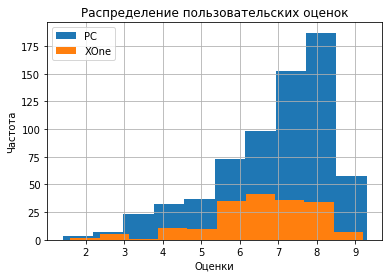

In [63]:
ax = pc_user_score.plot(kind='hist', label='PC')
xone_user_score.plot(kind='hist', ax=ax, label='XOne', grid=True, 
                     title='Распределение пользовательских оценок')
plt.ylabel('Частота')
plt.xlabel('Оценки')
plt.legend()

Оба распределения можно назвать нормальными но с большим перекосом вправо

Расчитаем дисперсии распределений для того чтобы определить как использовать параметр Т-теста `equal_var`

In [64]:
display(round(np.var(xone_user_score), 2))
display(round(np.var(pc_user_score), 2))

1.9

2.31

Дисперсии различаются, параметр `equal_var` необходимо установить `False`

Проведем статистический тест

In [65]:
results1 = st.ttest_ind(xone_user_score, pc_user_score, equal_var=False)

print('p-значение:', results1.pvalue)

if results1.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.0008310561209657819
Отвергаем нулевую гипотезу


Наблюдаемый уровень значимости ниже критического, это значит что мы должны отвергнуть нулевую гипотезу и принять альтернативную - cредние пользовательские рейтинги платформ Xbox One и PC различаются

### Гипотеза 2 - Средние пользовательские рейтинги жанров Action и Sports разные<a id="stage_5_hypothesis_2"></a>

* Нулевая гипотеза - Средние пользовательские рейтинги жанров Action и Sports одинаковые


* Альтернативная гипотеза - Средние пользовательские рейтинги жанров Action и Sports различаются

Запишем рейтинги в переменные

In [66]:
action_user_score = actual_data[['user_score','genre']].query('genre == "Action"')['user_score'].dropna()
sports_user_score = actual_data[['user_score','genre']].query('genre == "Sports"')['user_score'].dropna()

Построим распределения

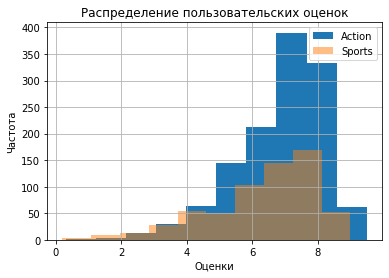

In [67]:
ax = action_user_score.plot(kind='hist', label='Action')
sports_user_score.plot(kind='hist', ax=ax, label='Sports', grid=True, 
                       title='Распределение пользовательских оценок', alpha=0.5)
plt.ylabel('Частота')
plt.xlabel('Оценки')
plt.legend()

Распределения похожи на нормальные распределения скошенные вправо

Расчитаем дисперсии распределений для того чтобы определить как использовать параметр Т-теста `equal_var`

In [68]:
display(round(np.var(action_user_score), 2))
display(round(np.var(sports_user_score), 2))

1.79

2.71

Дисперсии различаются, параметр `equal_var` необходимо установить `False`

Проведем статистический тест

In [69]:
results2 = st.ttest_ind(action_user_score, sports_user_score, equal_var=False)

print('p-значение:', results2.pvalue)

if results2.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.8221886353904287e-11
Отвергаем нулевую гипотезу


Наблюдаемый  уровень значимости ниже критического, значит, пока не доказано обратное, мы можем считать что средние пользовательские рейтинги жанров Action и Sports различаются

## Вывод <a id="stage_5_summary"></a>

На данном этапе мы проверяли две гипотезы:
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
2. Средние пользовательские рейтинги жанров Action и Sports разные

Для проведения Т-тестов мы выдвинули следующие нулевые гипотезы:
1. Средние пользовательские рейтинги платформ Xbox One и PC равны
2. Средние пользовательские рейтинги жанров Action и Sports одинаковые

В результате проведенных Т-тестов мы **отвергли** обе нулевые гипотезы

В итоге, пока не показано другое, мы можем считать что
1. Средние пользовательские рейтинги платформ Xbox One и PC разные
2. Средние пользовательские рейтинги жанров Action и Sports разные

# Общий вывод<a id="conclusion"></a>

После загрузки данных мы **удалили из таблицы 1,62% записей** с пропущенными датами выпуска или с незаполненным названием и жанром игры, далее мы изменили тип данных некоторых столббцов и добавили столбец содержащий общемировые продажи каждой игры

Далее мы выбрали актуальный период для анализа - прошлое (2004-2011) и последнее (2011-) поколения платформ и определили наиболее **перспективные с точки зрения прибыльности платформы - PS4 и XOne** так как продажи на этих платформах продолжают расти в то время как на остальных платформах из Топ3 последнего поколения они снижаются

Анализ продаж игр по платформам последнего поколения показал что **продажи игр редко превышают 1 млн**, подробный анализ продаж на платформах PS4 и XOne показал сходные результаты, кроме того анализ статистических показателей выявил **сходство 75% распределения продаж игр на этих (PS4 и XOne) платформах**, но на PS4 максимальные, а следовательно и средние, продажи гораздо выше чем на XOne

Анализ силы корреляции между между оценками игроков и критиков с продажами игр на самой популярной платформе в последнем поколении (PS4) показал что **сила связи между оценкой критиков и продажами слабая**, а между оценкой пользователей и продажами практически отсутствует

Анализ продаж игр в разрезе жанров выявил что большим отрывом **лидирует жанр Action**, следом, практически наравне идут продажи игр жанров Sports и Shooter, а замыкают рейтинг игры жанров Adventure, Puzzle и Strategy, при этом игры жанра Strategy продаются в 14 раз хуже чем игры жанра Action

Во время анализа ситуации на разных рынках (Северная Америка, Европа и Япония) мы наблюдали следующее:
 * Рынки Северной Америки и Европы **очень схожи** по всем параметрам:
   * предпочтения отдаются домашним платформам
   * жанровые предпочтения не различаются (на первом месте по продажам игры жанра Action, на втором и третьем Shooter и Sports)
   * в разрезе рейтинга ESRB продажи сходные (больше всего продается игр с рейтингом E, далее M и T)
 * Рынок Японии **обособлен от остального мира** и характеризуются следующим:
   * предпочтения отдаются портативным платформам
   * жанровые предпочтения тоже свои (на первом месте Role-Playing (с большим отрывом), а игры жанра Action на втором)
   * по рейтингу ESRB продажи игр распределены немного иначе (больше всего продается игр с рейтингом E, далее T и M)   
   
На заключительном этапе анализа мы провели статистические тесты для оценки достоверности следующих гипотез:
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
2. Средние пользовательские рейтинги жанров Action и Sports разные

И пришли к следующим выводам:
1. Средние пользовательские рейтинги платформ Xbox One и PC разные
2. Средние пользовательские рейтинги жанров Action и Sports разные